<a href="https://colab.research.google.com/github/lyeslehara1996/Colab/blob/Dev/RNN_sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#declaration des module 

import pandas as pd 
import re 
import nltk
import matplotlib.pyplot as plt
from sklearn.preprocessing  import MinMaxScaler
import numpy as np

from sklearn.preprocessing import LabelBinarizer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
from keras.preprocessing.text import Tokenizer
from nltk.tokenize import TweetTokenizer
from nltk import FreqDist
import string 
SAVE_FILE = False

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split

from nltk.corpus import stopwords
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df=pd.read_excel('/content/SemEval2017.xlsx')
df.head()

,id,polariy,Comments,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,619950566786113024,neutral,"Picturehouse's, Pink Floyd's, 'Roger Waters: T...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,619969366986235008,neutral,Order Go Set a Watchman in store or through ou...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,619971047195044992,negative,If these runway renovations at the airport pre...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,619974445185302016,neutral,If you could ask an onstage interview question...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,619987808317406976,positive,A portion of book sales from our Harper Lee/Go...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.drop("Unnamed: 3", axis=1, inplace=True)
df.drop("Unnamed: 4", axis=1, inplace=True)
df.drop("Unnamed: 5", axis=1, inplace=True)
df.drop("Unnamed: 6", axis=1, inplace=True)
df.drop("Unnamed: 7", axis=1, inplace=True)
df.drop("Unnamed: 8", axis=1, inplace=True)
df.drop("Unnamed: 9", axis=1, inplace=True)
df.drop("Unnamed: 10", axis=1, inplace=True)
df.drop("Unnamed: 11", axis=1, inplace=True)
df.drop("Unnamed: 12", axis=1, inplace=True)
df.drop("Unnamed: 13", axis=1, inplace=True)
df.drop("Unnamed: 14", axis=1, inplace=True)
df.drop("Unnamed: 15", axis=1, inplace=True)

In [ ]:
df.head()

,id,polariy,Comments
0,619950566786113024,neutral,"Picturehouse's, Pink Floyd's, 'Roger Waters: T..."
1,619969366986235008,neutral,Order Go Set a Watchman in store or through ou...
2,619971047195044992,negative,If these runway renovations at the airport pre...
3,619974445185302016,neutral,If you could ask an onstage interview question...
4,619987808317406976,positive,A portion of book sales from our Harper Lee/Go...


In [ ]:
df.polariy.value_counts()

neutral     10342
positive     7059
negative     3231
Name: polariy, dtype: int64

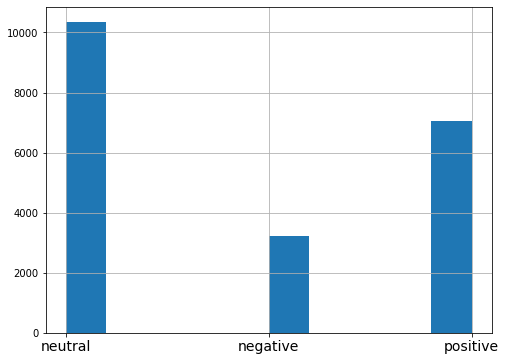

In [ ]:
plt.figure(figsize=(8,6))
df.polariy.hist(xlabelsize=14)
plt.show()

In [ ]:
df.describe()

,id,polariy,Comments
count,20633,20632,20632
unique,20557,3,20551
top,639994382930866048,neutral,New Adele album coming in November along with ...
freq,2,10342,2


In [ ]:
df_clean = df
df_clean.Comments=df_clean.Comments.str.lower()
df_clean.head()

,id,polariy,Comments
0,619950566786113024,neutral,"picturehouse's, pink floyd's, 'roger waters: t..."
1,619969366986235008,neutral,order go set a watchman in store or through ou...
2,619971047195044992,negative,if these runway renovations at the airport pre...
3,619974445185302016,neutral,if you could ask an onstage interview question...
4,619987808317406976,positive,a portion of book sales from our harper lee/go...


In [ ]:
df_clean.Comments = df_clean.Comments.apply(lambda x: re.sub(r'https?:\/\/\S+', ' ', str(x)))
df_clean.Comments = df_clean.Comments.apply(lambda x: re.sub(r"www\.[a-z]?\.?(com)+|[a-z]+\.(com)", ' ', str(x)))
df_clean.Comments = df_clean.Comments.apply(lambda x: re.sub(r'{link}', ' ', str(x)))
df_clean.Comments = df_clean.Comments.apply(lambda x: re.sub(r'&[a-z]+;', ' ', str(x)))
df_clean.Comments = df_clean.Comments.apply(lambda x: re.sub(r"[^a-z]", ' ', str(x)))
df_clean.Comments = df_clean.Comments.apply(lambda x: re.sub(r'@mention', ' ', x))
df_clean.Comments = df_clean.Comments.apply(lambda x: " ".join(x.lower() for x in str(x).split()  if len(x)>2 ))


,id,polariy,Comments
0,619950566786113024,neutral,picturehouse pink floyd roger waters the walll...
1,619969366986235008,neutral,order set watchman store through our website b...
2,619971047195044992,negative,these runway renovations the airport prevent f...
3,619974445185302016,neutral,you could ask onstage interview question miss ...
4,619987808317406976,positive,portion book sales from our harper lee set wat...
...,...,...,...
20628,681877834982232064,neutral,shaquillehoneal from what think you asking ord...
20629,681879579129200000,positive,iran ranks liver surgeries allah bless the cou...
20630,681883903259357056,neutral,hours before arrived saudi arabia tuesday turk...
20631,681904976860327040,negative,vanityfair alex kim kardashian worth how love ...


In [ ]:
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

In [ ]:
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on review column
df_clean['Comments']=df_clean['Comments'].apply(remove_stopwords)

{'such', 'through', 'did', "mightn't", 'by', 'in', 'theirs', 'same', 'it', 'whom', 'into', 'a', "couldn't", 'until', 'when', 'been', 'didn', 'with', "hasn't", 'but', 'was', 'on', 'y', 'for', 'or', 'mightn', 'who', 'does', 'shouldn', 'yours', "don't", 'me', 'yourself', 'further', 'ma', "it's", 'weren', 'as', 'how', "mustn't", 'i', 'any', 'this', 'why', 'more', "you're", 'very', 'once', 'there', 'had', 'some', 'while', "wasn't", 'doing', "she's", 'where', 'between', 'she', 'they', 'are', 'not', 'out', 'only', 'here', 'ourselves', 'at', 'nor', 'itself', 'their', 'ours', 'should', "doesn't", "shouldn't", 'most', "you'd", 'no', 'than', 'don', 'himself', 'myself', 'too', 's', 'because', "shan't", 'll', 'won', 'we', 'aren', 'her', 'over', "wouldn't", 'those', 'against', 'were', 'having', 'what', 'from', 'few', 't', 'have', 'ain', 'haven', 'herself', "needn't", 'am', "aren't", 'be', 'just', 'during', 'shan', 'its', 'has', 'them', 'then', "weren't", 'again', 'wasn', 'yourselves', 'off', "didn't

In [ ]:
df_clean.head()

,id,polariy,Comments
0,619950566786113024,neutral,picturehouse pink floyd roger waters walll ope...
1,619969366986235008,neutral,order set watchman store website tuesday get h...
2,619971047195044992,negative,runway renovations airport prevent seeing tayl...
3,619974445185302016,neutral,could ask onstage interview question miss usa ...
4,619987808317406976,positive,portion book sales harper lee set watchman rel...


In [ ]:
corpus= []
for text in df_clean['Comments']:
    words= [word.lower() for word in word_tokenize(text)]
    corpus.append(words)

In [ ]:

from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()
df_clean['Clean_Comment'] = df_clean['Comments'].apply(tknzr.tokenize)
df_clean.head()

,id,polariy,Comments,Clean_Comment
0,619950566786113024,neutral,picturehouse pink floyd roger waters walll ope...,"[picturehouse, pink, floyd, roger, waters, wal..."
1,619969366986235008,neutral,order set watchman store website tuesday get h...,"[order, set, watchman, store, website, tuesday..."
2,619971047195044992,negative,runway renovations airport prevent seeing tayl...,"[runway, renovations, airport, prevent, seeing..."
3,619974445185302016,neutral,could ask onstage interview question miss usa ...,"[could, ask, onstage, interview, question, mis..."
4,619987808317406976,positive,portion book sales harper lee set watchman rel...,"[portion, book, sales, harper, lee, set, watch..."


In [ ]:
if SAVE_FILE:
    df_clean.to_excel('/content/savedData.xlsx', index=False)

In [ ]:
data=pd.read_excel('/content/savedData.xlsx')
data.head()


,id,polariy,Comments,Clean_Comment
0,619950566786113024,neutral,picturehouse pink floyd roger waters the walll...,"['picturehouse', 'pink', 'floyd', 'roger', 'wa..."
1,619969366986235008,neutral,order set watchman store through our website b...,"['order', 'set', 'watchman', 'store', 'through..."
2,619971047195044992,negative,these runway renovations the airport prevent f...,"['these', 'runway', 'renovations', 'the', 'air..."
3,619974445185302016,neutral,you could ask onstage interview question miss ...,"['you', 'could', 'ask', 'onstage', 'interview'..."
4,619987808317406976,positive,portion book sales from our harper lee set wat...,"['portion', 'book', 'sales', 'from', 'our', 'h..."


In [ ]:
data.drop("id", axis=1, inplace=True)
data.drop("Comments", axis=1, inplace=True)
data.head()

,polariy,Clean_Comment
0,neutral,"['picturehouse', 'pink', 'floyd', 'roger', 'wa..."
1,neutral,"['order', 'set', 'watchman', 'store', 'through..."
2,negative,"['these', 'runway', 'renovations', 'the', 'air..."
3,neutral,"['you', 'could', 'ask', 'onstage', 'interview'..."
4,positive,"['portion', 'book', 'sales', 'from', 'our', 'h..."


In [ ]:
data.polariy = data.polariy.apply(lambda x: re.sub(r'https?:\/\/\S+><', ' ', str(x)))

In [ ]:
num_words=len(corpus)
print(num_words)

20633


In [ ]:
data.shape

(20633, 2)

In [ ]:
train_size = int(data.shape[0] * 0.2 )
x_train =data.Clean_Comment[train_size:]
y_train = data.polariy[train_size:]

x_test= data.Clean_Comment[:train_size]
y_test=data.polariy[:train_size]
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(16507,) (16507,)
(4126,) (4126,)


In [ ]:
tokenizer =Tokenizer(num_words)
tokenizer.fit_on_texts(x_train)
x_train=tokenizer.texts_to_sequences(x_train)
x_train=pad_sequences(x_train, maxlen=128, truncating='post', padding='post')

In [ ]:

x_test=tokenizer.texts_to_sequences(x_test)
x_test=pad_sequences(x_test, maxlen=128, truncating='post', padding='post')

In [ ]:
  x_train[0], len(x_train[0])

(array([9678, 6615, 6616,   41,  243,    1, 1803,  282,  405,    9,   69,
         367, 1235, 2947,  509,  240, 1704,  200,  282, 6615,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0], dtype=int32), 128)

In [ ]:
x_test[0],len(x_test[0])

(array([ 1553,   402,  2939, 12072,     1,   788,   358,    40,   582,
         8561,   132,     1,  1113,   495,   515,   273,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
      

In [ ]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(16507, 128) (16507,)
(4126, 128) (4126,)


In [ ]:
  le=LabelEncoder()
  y_train= le.fit_transform(y_train)
  y_test= le.fit_transform(y_test)

In [ ]:
print(y_train)
print(y_test)

[1 2 1 ... 2 1 2]
[1 1 0 ... 1 2 2]


In [ ]:
model= Sequential()

model.add(Embedding(input_dim=num_words,output_dim=100,input_length=128,trainable=True))
model.add(LSTM(100,dropout=0.1,return_sequences=True ))
model.add(LSTM(100,dropout=0.1))
model.add(Dense(1,activation='softmax'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 128, 100)          2063300   
_________________________________________________________________
lstm_6 (LSTM)                (None, 128, 100)          80400     
_________________________________________________________________
lstm_7 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 2,224,201
Trainable params: 2,224,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=model.fit(x_train,y_train, epochs=5,batch_size=64,validation_data=(x_test,y_test))


Epoch 1/5
258/258 [==============================] - 117s 384ms/step - loss: -17.7770 - accuracy: 0.1660 - val_loss: -10.1472 - val_accuracy: 0.4651
Epoch 2/5
258/258 [==============================] - 99s 383ms/step - loss: -51.0028 - accuracy: 0.1583 - val_loss: -16.9787 - val_accuracy: 0.4651
Epoch 3/5
258/258 [==============================] - 98s 379ms/step - loss: -80.0799 - accuracy: 0.1637 - val_loss: -23.8055 - val_accuracy: 0.4651
Epoch 4/5
258/258 [==============================] - 97s 378ms/step - loss: -110.2421 - accuracy: 0.1639 - val_loss: -30.8254 - val_accuracy: 0.4651
Epoch 5/5
258/258 [==============================] - 97s 377ms/step - loss: -139.6229 - accuracy: 0.1602 - val_loss: -37.7445 - val_accuracy: 0.4651
